# KNN for Diabetes

Predict if a person gets infected by diabetes

Use the Diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import os
# os.chdir('../Data/')

# Load dataset
dataset = pd.read_csv('../Data/diabetes.csv')

# 1. Data discovery

In [2]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

## 1.1. Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1.1. Pairplot

<Figure size 432x288 with 0 Axes>

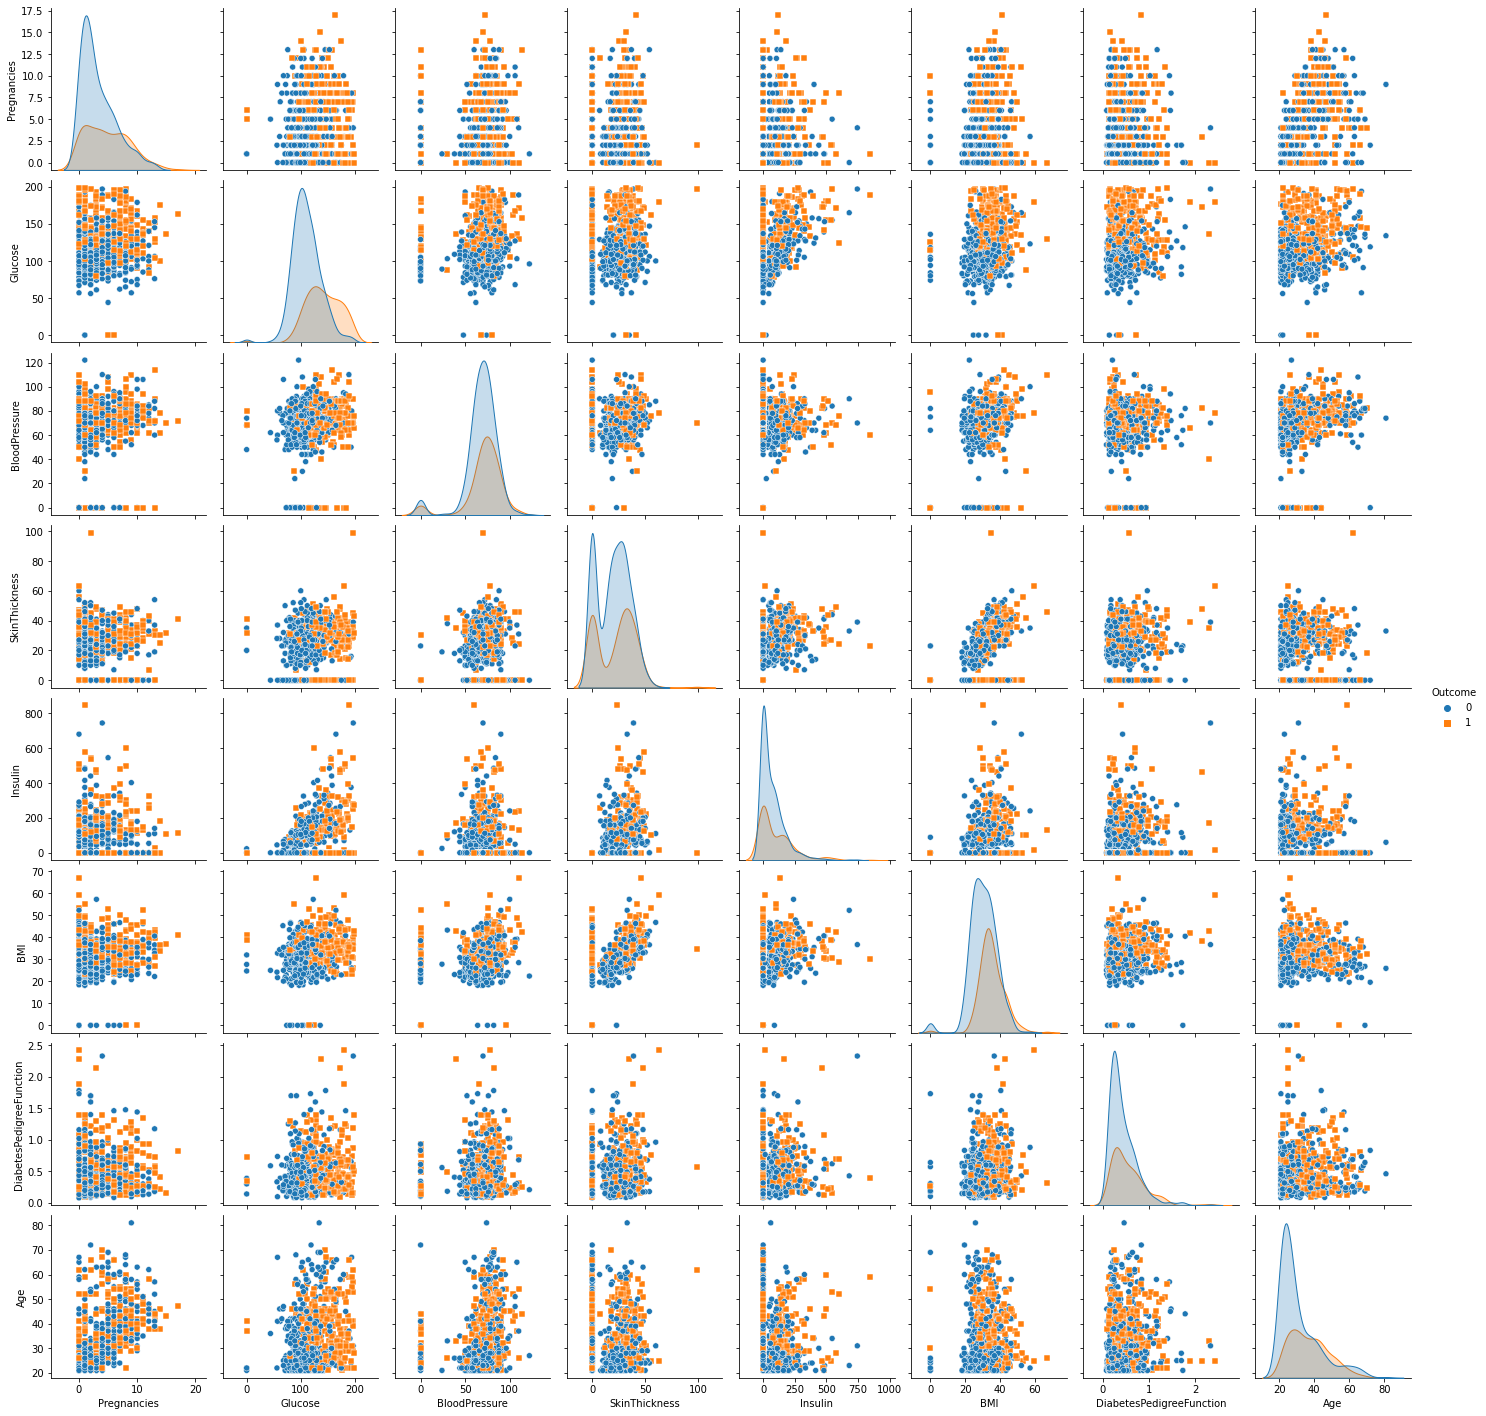

In [5]:
plt.figure()
sns.pairplot(dataset, hue = "Outcome", markers=['o', 's'])
plt.show()

### 1.1.2. Boxplot

<Figure size 432x288 with 0 Axes>

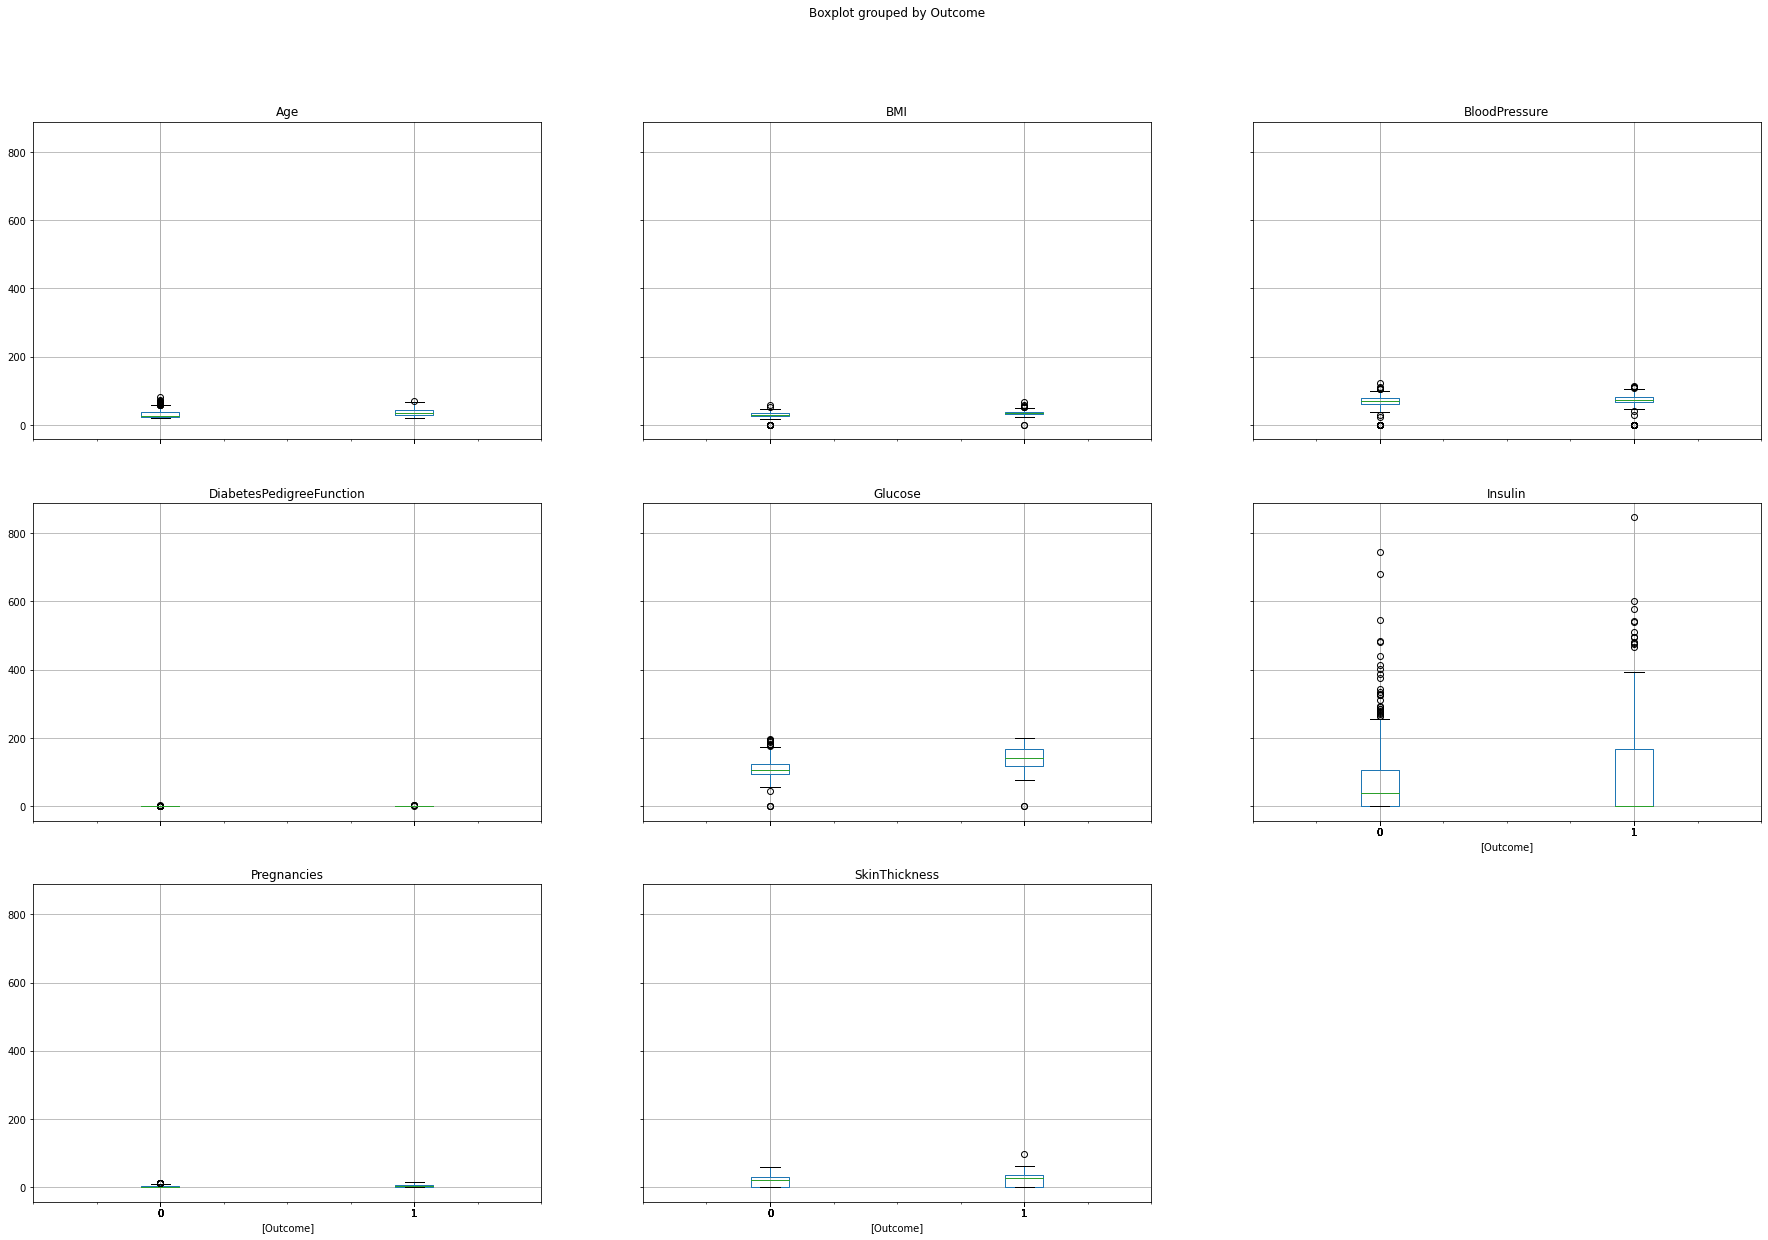

In [6]:
plt.figure()
dataset.boxplot(by="Outcome", figsize=(30, 20))
plt.show()

# 2. Data Processing

In [7]:
# Determine features and labels
X = dataset.drop('Outcome', axis=1).values
y = dataset['Outcome'].values

## 2.1. Normalization

In [8]:
# Using max normalization on X
from sklearn.preprocessing import normalize
X_norm = normalize(X, norm='max', axis=0)
print(X_norm, X_norm.shape)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.25909091 0.61728395]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.14504132 0.38271605]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.27768595 0.39506173]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.10123967 0.37037037]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.14421488 0.58024691]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.13016529 0.28395062]] (768, 8)


## 2.2. Splitting dataset into trainset and testset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2)

In [10]:
print(X_norm.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(768, 8) (768,)
(614, 8) (614,)
(154, 8) (154,)


# 3. Using KNN for classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

## 3.1. Choosing k

In [12]:
# Candidates of k (odd numbers from 1 to sqrt(len(y_train)))
neighbors = np.array(range(1, int(round(np.sqrt(len(y_train))) + 1), 2))

# Setup arrays to store training and test accuracy
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

cross_validation = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
    # Cross-validation
    cross_validation[i] = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_norm, y, cv=10, scoring='accuracy', n_jobs=-1).mean()

In [13]:
# Choose k based on the highest value of cross_validation accuracy
k_idx = cross_validation.argmax()
k = neighbors[k_idx]
print('k = ' + str(k))

k = 15


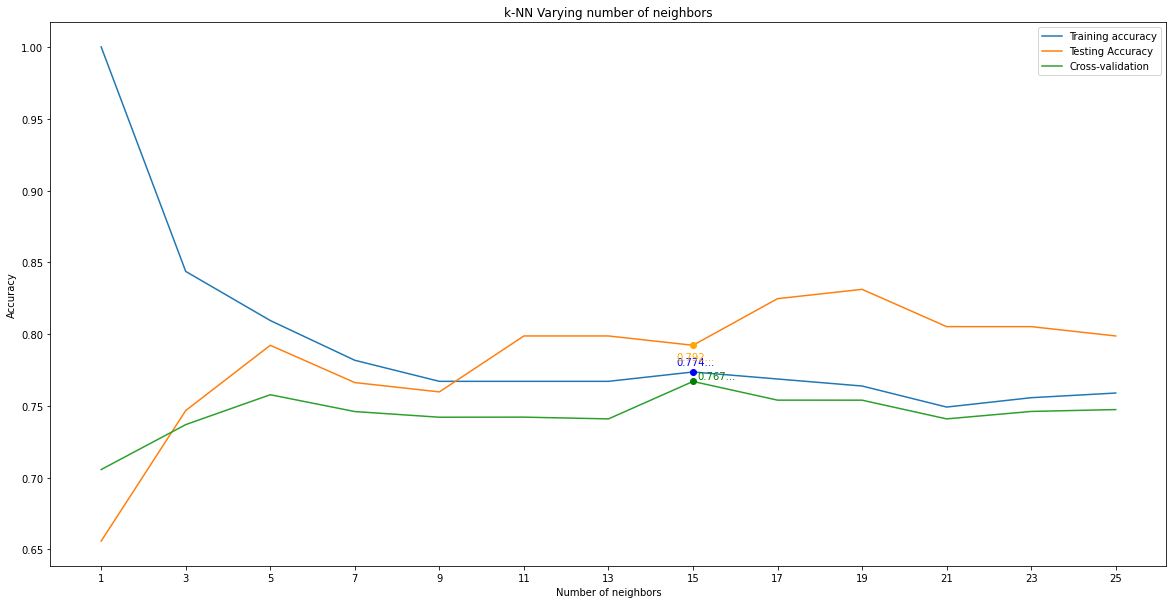

In [14]:
# Generate plot
plt.figure(figsize=(20, 10))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, cross_validation, label='Cross-validation')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.plot(k, train_accuracy[k_idx], marker='o', color='b')
plt.annotate(str(format(train_accuracy[k_idx], '.3f')) + '...', xy=(k - 0.4, train_accuracy[k_idx] + 0.005), color='b')
plt.plot(k, test_accuracy[k_idx], marker='o', color='orange')
plt.annotate(str(format(test_accuracy[k_idx], '.3f')) + '...', xy=(k - 0.4, test_accuracy[k_idx] - 0.01), color='orange')
plt.plot(k, cross_validation.max(), marker='o', color='g')
plt.annotate(str(format(cross_validation.max(), '.3f')) + '...', xy=(k + 0.1, cross_validation.max() + 0.002), color='g')
plt.show()

## 3.2. Fitting the model

In [15]:
# Create classifier with chosen k
classifier = KNeighborsClassifier(n_neighbors=k)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

## 3.3. Prediction

In [16]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

## 3.4. Evaluating the model for the test set

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[98, 10],
       [22, 24]], dtype=int64)

In [18]:
# Using accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 79.22 %.
